통계 파일로부터 저장된 csv 파일 불러다가 플롯 그리는 역할.

In [6]:
# 사전 변수
csv_dir = '/home/hschoi/leehyunwon/ECG-SNN/new_server/ver6/statistics/tensorboard_to_pandas/window.csv'
savefile_name = 'window.pdf'

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



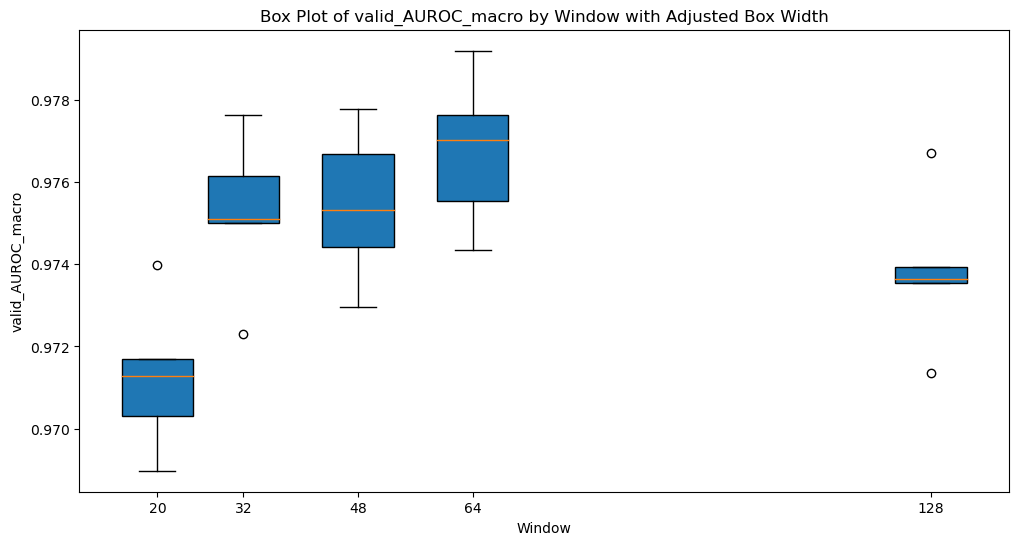

In [20]:
# CSV 파일 불러오기
data = pd.read_csv(csv_dir)

# 1. 폴더명에서 'win_xx' 추출하여 x축 값 추가
def extract_win(source_dir):
    if "win" in source_dir:
        # 'win' 뒤의 값을 추출
        win_value = int(source_dir.split("win")[1].split("_")[0])
        return win_value
    return 32

data['win'] = data['source_dir'].apply(extract_win)

# 2. 폴더명에서 시간 기록(yyyy-mm-dd-hh-mm-ss)을 추출하여 그룹화 키 추가
def extract_time_key(source_dir):
    return "-".join(source_dir.split("_")[:-2])

data['time_key'] = data['source_dir'].apply(extract_time_key)

# box plot 그리기
metrics = ["valid_AUROC_macro"]


# 박스플롯 생성
for metric in metrics:
    plt.figure(figsize=(12, 6))

    # 고유 채널 값을 정렬하여 실제 x축 위치를 설정
    unique_wins = sorted(data['win'].unique())
    grouped_data = [data[data['win'] == win][metric].values for win in unique_wins]

    # 박스플롯 생성 (박스 두께 조정)
    plt.boxplot(
        grouped_data,               # 각 그룹의 데이터를 리스트로 전달
        positions=unique_wins,  # x축 위치
        widths=10,                  # 박스 두께를 조정 (기본값보다 두껍게 설정)
        patch_artist=True           # 색상 및 스타일 변경 가능
    )

    # x축을 실제 채널 값으로 표시
    plt.xticks(ticks=unique_wins, labels=unique_wins)
    plt.xlabel("Window")
    plt.ylabel(metric)
    plt.title(f"Box Plot of {metric} by Window with Adjusted Box Width")

    # PDF 저장
    savefile_name = f"{metric}_boxplot_adjusted_width.pdf"
    plt.savefig(savefile_name, format="pdf", bbox_inches="tight")
    plt.show()

plt.close()